# Microsoft Movie Studio Components Analysis


# Business Understanding

### Overview
The project is investigating and analyzing what components are needed to get started in the movie production business. We will be using the top grossing genres domestically, top grossing directors domestically and domestic gross by release month, this will show what genres of film to initially to make, which directors to use and when is a good time to release the film

# Data Understanding

#### Gathering multiple CSV files to create a dictionary where the key is the name of the file and the value is data frame 



In [1]:
#importing data using glob

import os
from glob import glob
import pandas as pd

csv_files = glob("./zippedData/*.csv.gz")
csv_files

#cleaning the filenames
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") 

    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df



#### Importing key Python libraries for data analysis and visualization

In [24]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [26]:
import seaborn as sns

In [2]:
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [4]:
# Showing the key for diction tah was created

csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

## Data Preparation


#### Assigning variables to imported and cleaned DataFrames

In [5]:
imdb_title_principals_df = csv_files_dict['imdb_title_principals_gz']

In [6]:
tmdb_movies_df = csv_files_dict['tmdb_movies_gz']

In [7]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross_gz']

In [8]:
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [9]:
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']

In [10]:
imdb_name_basics_df = csv_files_dict['imdb_name_basics_gz']

In [11]:
imdb_title_akas_df = csv_files_dict['imdb_title_akas_gz']

In [12]:
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

### Top Grossing Genres Domestically
#### imdb_title_basics DataFrame, setting index for 'primary title' column

In [13]:
imdb_title_basics_df.set_index('primary_title', inplace=True)
imdb_title_basics_df.head()

,original_title,start_year,runtime_minutes,genres
primary_title,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
'''Joining imdb_title_basics and bom_movie_gross data frames, 
by doing so these two data frames will give us 
the genres and domestic gross columns we need
'''
genres_domestic_gross_foreign_gross_df = imdb_title_basics_df.join(bom_movie_gross_df, how='inner')

In [15]:
genres_domestic_gross_foreign_gross_df.head()

,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
'71,'71,2014,99.0,"Action,Drama,Thriller",RAtt.,1300000.0,355000,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",FM,53900.0,NaN,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",Par.,72100000.0,38100000,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",Anch.,203000.0,NaN,2012
1001 Grams,1001 Gram,2014,93.0,Drama,KL,11000.0,NaN,2015


#### Using a split to remove the commas from the 'genres' column

In [16]:
genres_domestic_gross_foreign_gross_df.genres = genres_domestic_gross_foreign_gross_df.genres.str.split(",")

#### The explode of 'genres' column will give each genres its own row

In [17]:
genres_domestic_gross_foreign_gross_df.explode('genres')

,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
'71,'71,2014,99.0,Action,RAtt.,1300000.0,355000,2015
'71,'71,2014,99.0,Drama,RAtt.,1300000.0,355000,2015
'71,'71,2014,99.0,Thriller,RAtt.,1300000.0,355000,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,Drama,FM,53900.0,NaN,2014
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,War,FM,53900.0,NaN,2014
...,...,...,...,...,...,...,...,...
Zookeeper,Zookeeper,2011,102.0,Romance,Sony,80400000.0,89500000,2011
Zoolander 2,Zoolander 2,2016,101.0,Comedy,Par.,28800000.0,27900000,2016
Zootopia,Zootopia,2016,108.0,Adventure,BV,341300000.0,682500000,2016
Zootopia,Zootopia,2016,108.0,Animation,BV,341300000.0,682500000,2016


#### Naming the new data frame and once again doing an explode and reset index

In [18]:
genres_dg_fg_df = genres_domestic_gross_foreign_gross_df.explode('genres').reset_index(drop=True)


In [19]:
genres_dg_fg_df.head(n=10)

,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,'71,2014,99.0,Action,RAtt.,1300000.0,355000,2015
1,'71,2014,99.0,Drama,RAtt.,1300000.0,355000,2015
2,'71,2014,99.0,Thriller,RAtt.,1300000.0,355000,2015
3,Tusen ganger god natt,2013,117.0,Drama,FM,53900.0,NaN,2014
4,Tusen ganger god natt,2013,117.0,War,FM,53900.0,NaN,2014
5,10 Cloverfield Lane,2016,103.0,Drama,Par.,72100000.0,38100000,2016
6,10 Cloverfield Lane,2016,103.0,Horror,Par.,72100000.0,38100000,2016
7,10 Cloverfield Lane,2016,103.0,Mystery,Par.,72100000.0,38100000,2016
8,10 Years,2011,100.0,Comedy,Anch.,203000.0,NaN,2012
9,10 Years,2011,100.0,Drama,Anch.,203000.0,NaN,2012


#### Groupby genres_dg_fg_mean_df

In [20]:
# This will give generate the mean gross of a particular genre

genres_dg_fg_mean_df = genres_dg_fg_df.groupby('genres').mean()

In [21]:
genres_dg_fg_mean_df.head()

,start_year,runtime_minutes,domestic_gross,year
genres,,,,
Action,2014.024096,115.061444,5.841816e+07,2014.072289
Adventure,2014.165919,109.622472,9.440941e+07,2014.278027
Animation,2014.197452,94.812903,8.732619e+07,2014.477707
Biography,2014.392157,107.964052,2.098164e+07,2014.673203
Comedy,2013.663212,104.660297,3.378180e+07,2013.829016


#### Reseting the index for the 'genres' column

In [22]:
genres_dg_fg_mean_df.reset_index(inplace=True)

In [23]:
genres_dg_fg_mean_df.head()

,genres,start_year,runtime_minutes,domestic_gross,year
0,Action,2014.024096,115.061444,5.841816e+07,2014.072289
1,Adventure,2014.165919,109.622472,9.440941e+07,2014.278027
2,Animation,2014.197452,94.812903,8.732619e+07,2014.477707
3,Biography,2014.392157,107.964052,2.098164e+07,2014.673203
4,Comedy,2013.663212,104.660297,3.378180e+07,2013.829016


### Top Grossing Directors Domestically
imdb_title_crew and imdb_name_basics data frames and then once again merging the newly created data frame with imdb_title_akas.
By merging these data sets we get the top grossing directors domestically

#### resetting index for the 'tconst' column

In [30]:
imdb_title_crew_df.reset_index(inplace=True)

In [31]:
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


#### Merging the imdb_title_crew and imdb_name basics data frames

In [32]:
tc_directors_nb_nconst_df = imdb_title_crew_df.merge(imdb_name_basics_df,
                                                    left_on='directors',
                                                    right_on='nconst')
tc_directors_nb_nconst_df.head()

,tconst,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774"
1,tt0462036,nm1940585,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer","tt0462036,tt6740510"
2,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
3,tt0859635,nm0151540,"nm0151540,nm0373571,nm0501399,nm0815418,nm0831479",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745"
4,tt0879859,nm2416460,NaN,Eric Manchester,NaN,NaN,"director,writer","tt0879861,tt0879859"


#### Second merge of the newly created data frame (tc_directors_nb_nconst_df) with imdb_title_akas_df

In [33]:
tc_directors_nb_nconst_takas_tid_df = tc_directors_nb_nconst_df.merge(imdb_title_akas_df,
                                                                     left_on='tconst',
                                                                     right_on='title_id')
tc_directors_nb_nconst_takas_tid_df.head()

,tconst,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,ordering,title,region,language,types,attributes,is_original_title
0,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",1,Bikini Beach,SE,NaN,imdbDisplay,NaN,0.0
1,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",2,Célibataires et en cavale,FR,NaN,imdbDisplay,NaN,0.0
2,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",3,Jungle Juice,US,NaN,working,NaN,0.0
3,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",4,Untitled Beach Movie,US,NaN,working,NaN,0.0
4,tt0285252,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",5,Life's a Beach,NaN,NaN,original,NaN,1.0


#### Third merge of newly create data frame and genres_dg_fg_df

In [34]:
director_genres = tc_directors_nb_nconst_takas_tid_df.merge(genres_dg_fg_df,
                                                                     left_on='title',
                                                                     right_on='original_title')


#### Removing duplicates to cleanup data

In [35]:
director_genres_nodup_df = director_genres.drop_duplicates(subset='original_title')

In [36]:
director_genres_nodup_df.head()

,tconst,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,ordering,title,...,attributes,is_original_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer","tt0144557,tt0486551,tt0331953,tt0247745",14,The Babymakers,...,NaN,0.0,The Babymakers,2012,95.0,Comedy,MNE,7900.0,NaN,2012
2,tt1904996,nm0000431,"nm0572352,nm0922799",Taylor Hackford,1944.0,NaN,"producer,director,writer","tt0109642,tt0084434,tt0350258,tt0106469",10,Parker,...,NaN,0.0,Parker,2013,118.0,Action,FD,17600000.0,28600000,2013
50,tt1126618,nm0585011,nm0112459,Roger Michell,1956.0,NaN,"director,producer,actor","tt0125439,tt0127319,tt0489327,tt0375735",21,Morning Glory,...,NaN,1.0,Morning Glory,2010,107.0,Comedy,Par.,31000000.0,29000000,2010
62,tt2392326,nm0585011,nm0475659,Roger Michell,1956.0,NaN,"director,producer,actor","tt0125439,tt0127319,tt0489327,tt0375735",11,Le Week-End,...,NaN,1.0,Le Week-End,2013,93.0,Comedy,MBox,2200000.0,NaN,2014
74,tt1477855,nm0585011,nm0625695,Roger Michell,1956.0,NaN,"director,producer,actor","tt0125439,tt0127319,tt0489327,tt0375735",1,Hyde Park on Hudson,...,NaN,1.0,Hyde Park on Hudson,2012,94.0,Biography,Focus,6400000.0,2500000,2012


#### Split method is being performed to remove commas from the the 'primary_profession' column 

In [37]:
director_genres_nodup_df.primary_profession = director_genres_nodup_df.primary_profession.str.split(",")

/Users/joemendoza/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Explode method is being used to give rows the profession titles in 'primary_professions' column

In [38]:
director_genres_nodup_explode_df = director_genres_nodup_df.explode('primary_profession')

In [39]:
director_genres_nodup_explode_df.head()

,tconst,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,ordering,title,...,attributes,is_original_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,director,"tt0144557,tt0486551,tt0331953,tt0247745",14,The Babymakers,...,NaN,0.0,The Babymakers,2012,95.0,Comedy,MNE,7900.0,NaN,2012
0,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,actor,"tt0144557,tt0486551,tt0331953,tt0247745",14,The Babymakers,...,NaN,0.0,The Babymakers,2012,95.0,Comedy,MNE,7900.0,NaN,2012
0,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,writer,"tt0144557,tt0486551,tt0331953,tt0247745",14,The Babymakers,...,NaN,0.0,The Babymakers,2012,95.0,Comedy,MNE,7900.0,NaN,2012
2,tt1904996,nm0000431,"nm0572352,nm0922799",Taylor Hackford,1944.0,NaN,producer,"tt0109642,tt0084434,tt0350258,tt0106469",10,Parker,...,NaN,0.0,Parker,2013,118.0,Action,FD,17600000.0,28600000,2013
2,tt1904996,nm0000431,"nm0572352,nm0922799",Taylor Hackford,1944.0,NaN,director,"tt0109642,tt0084434,tt0350258,tt0106469",10,Parker,...,NaN,0.0,Parker,2013,118.0,Action,FD,17600000.0,28600000,2013


#### Explode method is being used to single out directors in the 'primary_profession' column

In [40]:
director_genres_nodup_explode_df = director_genres_nodup_explode_df[director_genres_nodup_explode_df['primary_profession']=="director"]

In [41]:
director_genres_nodup_explode_df.head()

,tconst,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,ordering,title,...,attributes,is_original_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0835418,nm0151540,"nm0310087,nm0841532",Jay Chandrasekhar,1968.0,NaN,director,"tt0144557,tt0486551,tt0331953,tt0247745",14,The Babymakers,...,NaN,0.0,The Babymakers,2012,95.0,Comedy,MNE,7900.0,NaN,2012
2,tt1904996,nm0000431,"nm0572352,nm0922799",Taylor Hackford,1944.0,NaN,director,"tt0109642,tt0084434,tt0350258,tt0106469",10,Parker,...,NaN,0.0,Parker,2013,118.0,Action,FD,17600000.0,28600000,2013
50,tt1126618,nm0585011,nm0112459,Roger Michell,1956.0,NaN,director,"tt0125439,tt0127319,tt0489327,tt0375735",21,Morning Glory,...,NaN,1.0,Morning Glory,2010,107.0,Comedy,Par.,31000000.0,29000000,2010
62,tt2392326,nm0585011,nm0475659,Roger Michell,1956.0,NaN,director,"tt0125439,tt0127319,tt0489327,tt0375735",11,Le Week-End,...,NaN,1.0,Le Week-End,2013,93.0,Comedy,MBox,2200000.0,NaN,2014
74,tt1477855,nm0585011,nm0625695,Roger Michell,1956.0,NaN,director,"tt0125439,tt0127319,tt0489327,tt0375735",1,Hyde Park on Hudson,...,NaN,1.0,Hyde Park on Hudson,2012,94.0,Biography,Focus,6400000.0,2500000,2012


Groupby method being used attain the mean if the 'primary_name' column

In [42]:
director_genres_nodup_mean_df = director_genres_nodup_explode_df.groupby('primary_name').mean()

In [43]:
director_genres_nodup_mean_df.head()

,birth_year,death_year,ordering,is_original_title,start_year,runtime_minutes,domestic_gross,year
primary_name,,,,,,,,
Aanand L. Rai,NaN,NaN,2.0,0.0,2015.0,128.0,3000000.0,2015.0
Aaron Katz,1981.0,NaN,2.0,1.0,2010.0,96.0,141000.0,2011.0
Aaron Wilson,NaN,NaN,3.0,1.0,2013.0,84.0,8500.0,2014.0
Abbas Kiarostami,1940.0,2016.0,16.0,0.0,2010.0,106.0,1400000.0,2011.0
Abdellatif Kechiche,1960.0,NaN,13.0,0.0,2013.0,180.0,2200000.0,2013.0


#### Resetting index

In [44]:
director_genres_nodup_mean_df.reset_index(inplace=True)

In [45]:
director_genres_nodup_mean_df.head()

,primary_name,birth_year,death_year,ordering,is_original_title,start_year,runtime_minutes,domestic_gross,year
0,Aanand L. Rai,NaN,NaN,2.0,0.0,2015.0,128.0,3000000.0,2015.0
1,Aaron Katz,1981.0,NaN,2.0,1.0,2010.0,96.0,141000.0,2011.0
2,Aaron Wilson,NaN,NaN,3.0,1.0,2013.0,84.0,8500.0,2014.0
3,Abbas Kiarostami,1940.0,2016.0,16.0,0.0,2010.0,106.0,1400000.0,2011.0
4,Abdellatif Kechiche,1960.0,NaN,13.0,0.0,2013.0,180.0,2200000.0,2013.0


#### Sorting values of the mean of the 'domestic_gross' in descending order

In [46]:
director_genres_nodup_mean_df.sort_values(by='domestic_gross', ascending=False, inplace=True)

In [47]:
director_genres_nodup_mean_df.head()

,primary_name,birth_year,death_year,ordering,is_original_title,start_year,runtime_minutes,domestic_gross,year
802,Joss Whedon,1964.0,NaN,15.0,0.0,2015.0,141.0,459000000.0,2015.0
1167,Patty Jenkins,1971.0,NaN,11.0,0.0,2017.0,141.0,412600000.0,2017.0
253,Chi-kin Kwok,NaN,NaN,3.0,1.0,2010.0,92.0,400700000.0,2013.0
10,Adam Green,1975.0,NaN,10.0,0.0,2010.0,93.0,400700000.0,2013.0
1543,Tim Miller,NaN,NaN,10.0,1.0,2016.0,108.0,363100000.0,2016.0


###  Domestic Gross by Release Month

In [49]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Setting up data frame  emphasizing 'release_month' and 'release_date'

In [50]:
tn_movie_budgets_df.release_date = pd.to_datetime(tn_movie_budgets_df.release_date)

In [51]:
tn_movie_budgets_df['release_month'] = tn_movie_budgets_df.release_date.dt.month_name()

In [52]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
id,,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


#### Removing money signs and comas from three columns

In [53]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
tn_movie_budgets_df[cols] = tn_movie_budgets_df[cols].replace({'\$':'', ',':''}, regex=True)

#### Converting specific columns into integers within three data frames

In [54]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype(int)

In [55]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].astype(int)

In [56]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype(int)

In [57]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,December
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,June
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December


#### Groupby and mean method used for the 'release_month' column 

In [58]:
tn_movie_budgets_gbmonth_df = tn_movie_budgets_df.groupby('release_month').mean()

#### Sorting Values of 'domestic_gross' column in descending order

In [59]:
tn_movie_budgets_gbmonth_df.sort_values(by='domestic_gross', ascending=False, inplace=True)

#### Reseting index

In [60]:
tn_movie_budgets_gbmonth_df.reset_index(inplace=True)


In [61]:
tn_movie_budgets_gbmonth_df.head()

,release_month,production_budget,domestic_gross,worldwide_gross
0,May,4.713520e+07,6.669795e+07,1.622680e+08
1,June,4.309912e+07,6.582791e+07,1.425230e+08
2,July,4.254616e+07,6.072804e+07,1.409636e+08
3,November,4.260006e+07,5.818117e+07,1.357416e+08
4,December,3.325161e+07,4.610082e+07,1.016932e+08


# Exploratory Data Analysis

### Data Analysis of Top Grossing Genres Domestically

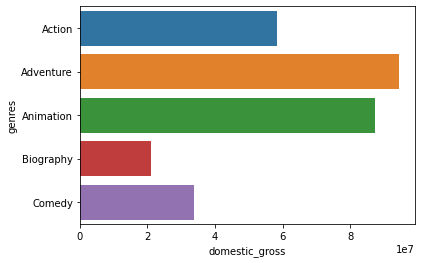

In [27]:
sns.barplot(x='domestic_gross', y='genres', data=genres_dg_fg_mean_df.iloc[0:5]);

In [28]:
genres_dg_fg_mean_df.sort_values(by='domestic_gross', ascending=False, inplace=True)

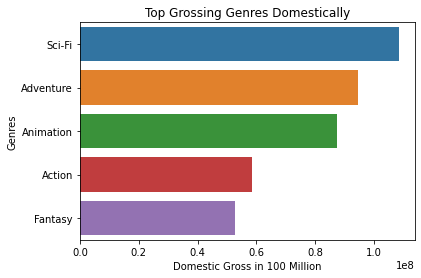

In [29]:
#plt.figure(figsize=(10,8))

sns.barplot(x='domestic_gross', y='genres', data=genres_dg_fg_mean_df.iloc[0:5])
plt.xlabel('Domestic Gross in 100 Million')
plt.ylabel('Genres')
plt.title('Top Grossing Genres Domestically');

#### The analysis concludes that the three top grossing genres domestically are:
- Sci-Fi
- Adventure
- Animation

### Data analysis of Top Grossing Directors Domestically

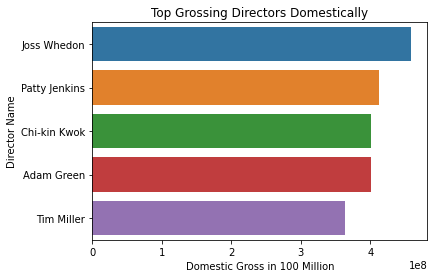

In [48]:
#plt.figure(figsize=(10,8))

sns.barplot(x='domestic_gross', y='primary_name', data=director_genres_nodup_mean_df.iloc[0:5]);
plt.xlabel('Domestic Gross in 100 Million')
plt.ylabel('Director Name')
plt.title('Top Grossing Directors Domestically');

#### The analysis concludes that the three top grossing directors domestically are:
- Joss Whedon
- Patty Jenkins
- Chi-kin Kwok

### Data Analysis of Domestic Gross by Release Month

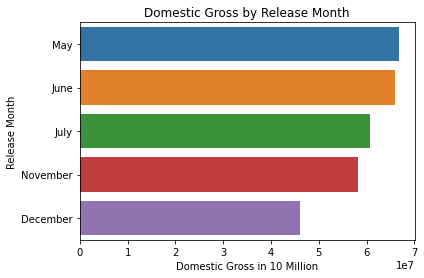

In [62]:
#plt.figure(figsize=(10,8))
sns.barplot(x='domestic_gross', y='release_month', data=tn_movie_budgets_gbmonth_df.iloc[0:5]);
plt.xlabel('Domestic Gross in 10 Million')
plt.ylabel('Release Month')
plt.title('Domestic Gross by Release Month');

#### The analysis concludes that the three top domestic gross by release month:
- May
- June
- July

# Conclusions

>These results/analysis shows insight towards three recommended steps in helping to choose what films should be created by the film studio 

- __The three top grossing genres domestically are Sci-Fi, Adventure and Action films__

These genres are good starting points

- __The top three top grossing directors domestically would be Joss Whedon, Patty Jenkins and Chi-kin Kwok__

Going by their track records all three directors would be good fits to direct film in the three top grossing genres mentioned above

- __The top three domestic gross by release month would be May, June and July__

The seasonal launch release time for a film is crucial, Spring/Summer seem to be common seasons associated with positive audience attendance to films 





## Limitations

- Some entries in the dataset may lack information such as domestic_growth or release_date. 
- Additionally, crucial details like a film's budget or genre might be absent for certain records, leading to incomplete analysis

## Recommendations

Collaborate with can you players in the film industry-such as production companies,distributors, and regulatory bodies-to ensure alignment of standards policies and best practices for responsible and effective film making


## Next Steps
- Once domestics releases are profitable, that's when the studio should consider thinking about global film releases
- There may be overlapping data when considering top genre, director and release month for a global market